<a href="https://colab.research.google.com/github/otlvrzl/transfer_learning1/blob/main/pretrained_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
tf.version.VERSION

'2.8.0'

In [ ]:
import numpy as np
import matplotlib.pylab as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [ ]:
# Load pretrained model VGG16
vgg16_model = tf.keras.applications.VGG16(
              weights="imagenet", 
              input_shape=(224, 224, 3),
              include_top = True)

553476096/553467096 [==============================] - 3s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# define a class that load and preprocess one image
def load_process_image(file_path):

  # Load image (in PIL image format by default)
  image_original = load_img(file_path, target_size=(224, 224))
  print("Image size after loading", image_original.size)

  # Convert to numpy array
  image_array = img_to_array(image_original)
  print("Image size after converting to numpy array", image_array.shape)

  # Expand dims to add batch size as 1
  image_batch = np.expand_dims(image_array, axis=0)
  print("Image size after expanding dimension", image_batch.shape)

  # Preprocess image
  image_preprocessed = tf.keras.applications.vgg16.preprocess_input(image_batch)

  return image_original, image_preprocessed

In [ ]:
!ls -la

total 16
drwxr-xr-x 1 root root 4096 Feb 18 14:33 .
drwxr-xr-x 1 root root 4096 Mar  5 09:47 ..
drwxr-xr-x 1 root root 4096 Feb 18 14:33 .config
drwxr-xr-x 1 root root 4096 Feb 18 14:33 sample_data


In [ ]:
# Set image file path
cat_image_file_path = "/content/cat1.jpg"

In [ ]:
cat_image_original, cat_image_preprocessed = load_process_image(cat_image_file_path)

Image size after loading (224, 224)
Image size after converting to numpy array (224, 224, 3)
Image size after expanding dimension (1, 224, 224, 3)


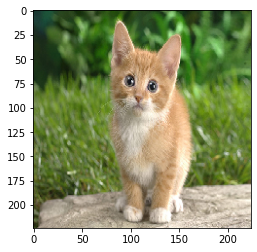

In [ ]:
plt.imshow(cat_image_original)

In [ ]:
# Get the predictions by the model
predictions = vgg16_model.predict(cat_image_preprocessed)

In [ ]:
predictions.shape

(1, 1000)

In [ ]:
# Get the prediction class with the highest probrabilities
predicted_class = decode_predictions(predictions, top=1)

49152/35363 [=========================================] - 0s 0us/step


In [ ]:
predicted_class

[[('n02119789', 'kit_fox', 0.30902168)]]